# Python Exercise: Data Exploration and Preparation

### Learning objectives
- Use Python (Pandas) to read data from a CSV file.
- Use Python (Seaborn) to do exploratory data analysis
- Implement a typical data pre-processing step: Standardization


## Tips: How to write code when you're new to a language and/or package

- search and download a cheatsheet (find them online or on our Moodle page)  
- look at online examples  
- use a search engine. Many problems have excellent solutions on http://stackoverflow.com/  
- ask colleagues or write on the forum. 
- Come to the exercise session and discuss different approaches!
- use chatGPT or Code-Llama (probably the fastest way nowadays, but don't let you fool, you still need to understand what you're doing)

### Dataset:  
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database 

*This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.*


### Code
Inspired from various sources, in particular this one:

https://www.kaggle.com/code/tanyildizderya/diabetes-prediction-with-logistic-regression




In [15]:
# We use a few very common Python Libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 

## Exercise
- Download the file 'diabetes_data.csv' from Moodle.  Make sure to place it in the same folder where this notebook is located 
- Use the Pandas library to read the file 'diabetes_data.csv' into a DataFrame (DF)

In [13]:
diabetes_data = pd.read_csv('diabetes_dataset.csv')

In [14]:
# show the first rows of the DF (use head)

diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
# show the metadata (use info)
# How many rows and columns does your dataset have?

diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


## Explore the data !
After locking away the test data, but before running any algorithm, always do some exploratory analysis of your data (or a subset thereof if the dataset is large):
- visualize!
- (visually) identify null values, outliers, erronous entries
- classify the features (feature is the common term for a column in your dataframe) and outcome(s): are they continuous or categorical?
- visualize the distributions (histogram). This is important later, because some algorithms assume a gaussian distribution
- Is your dataset balanced? That is, do we have the same number of samples (rows) in the two classes *outcome=1* and *outcome=0* ?
- etc...

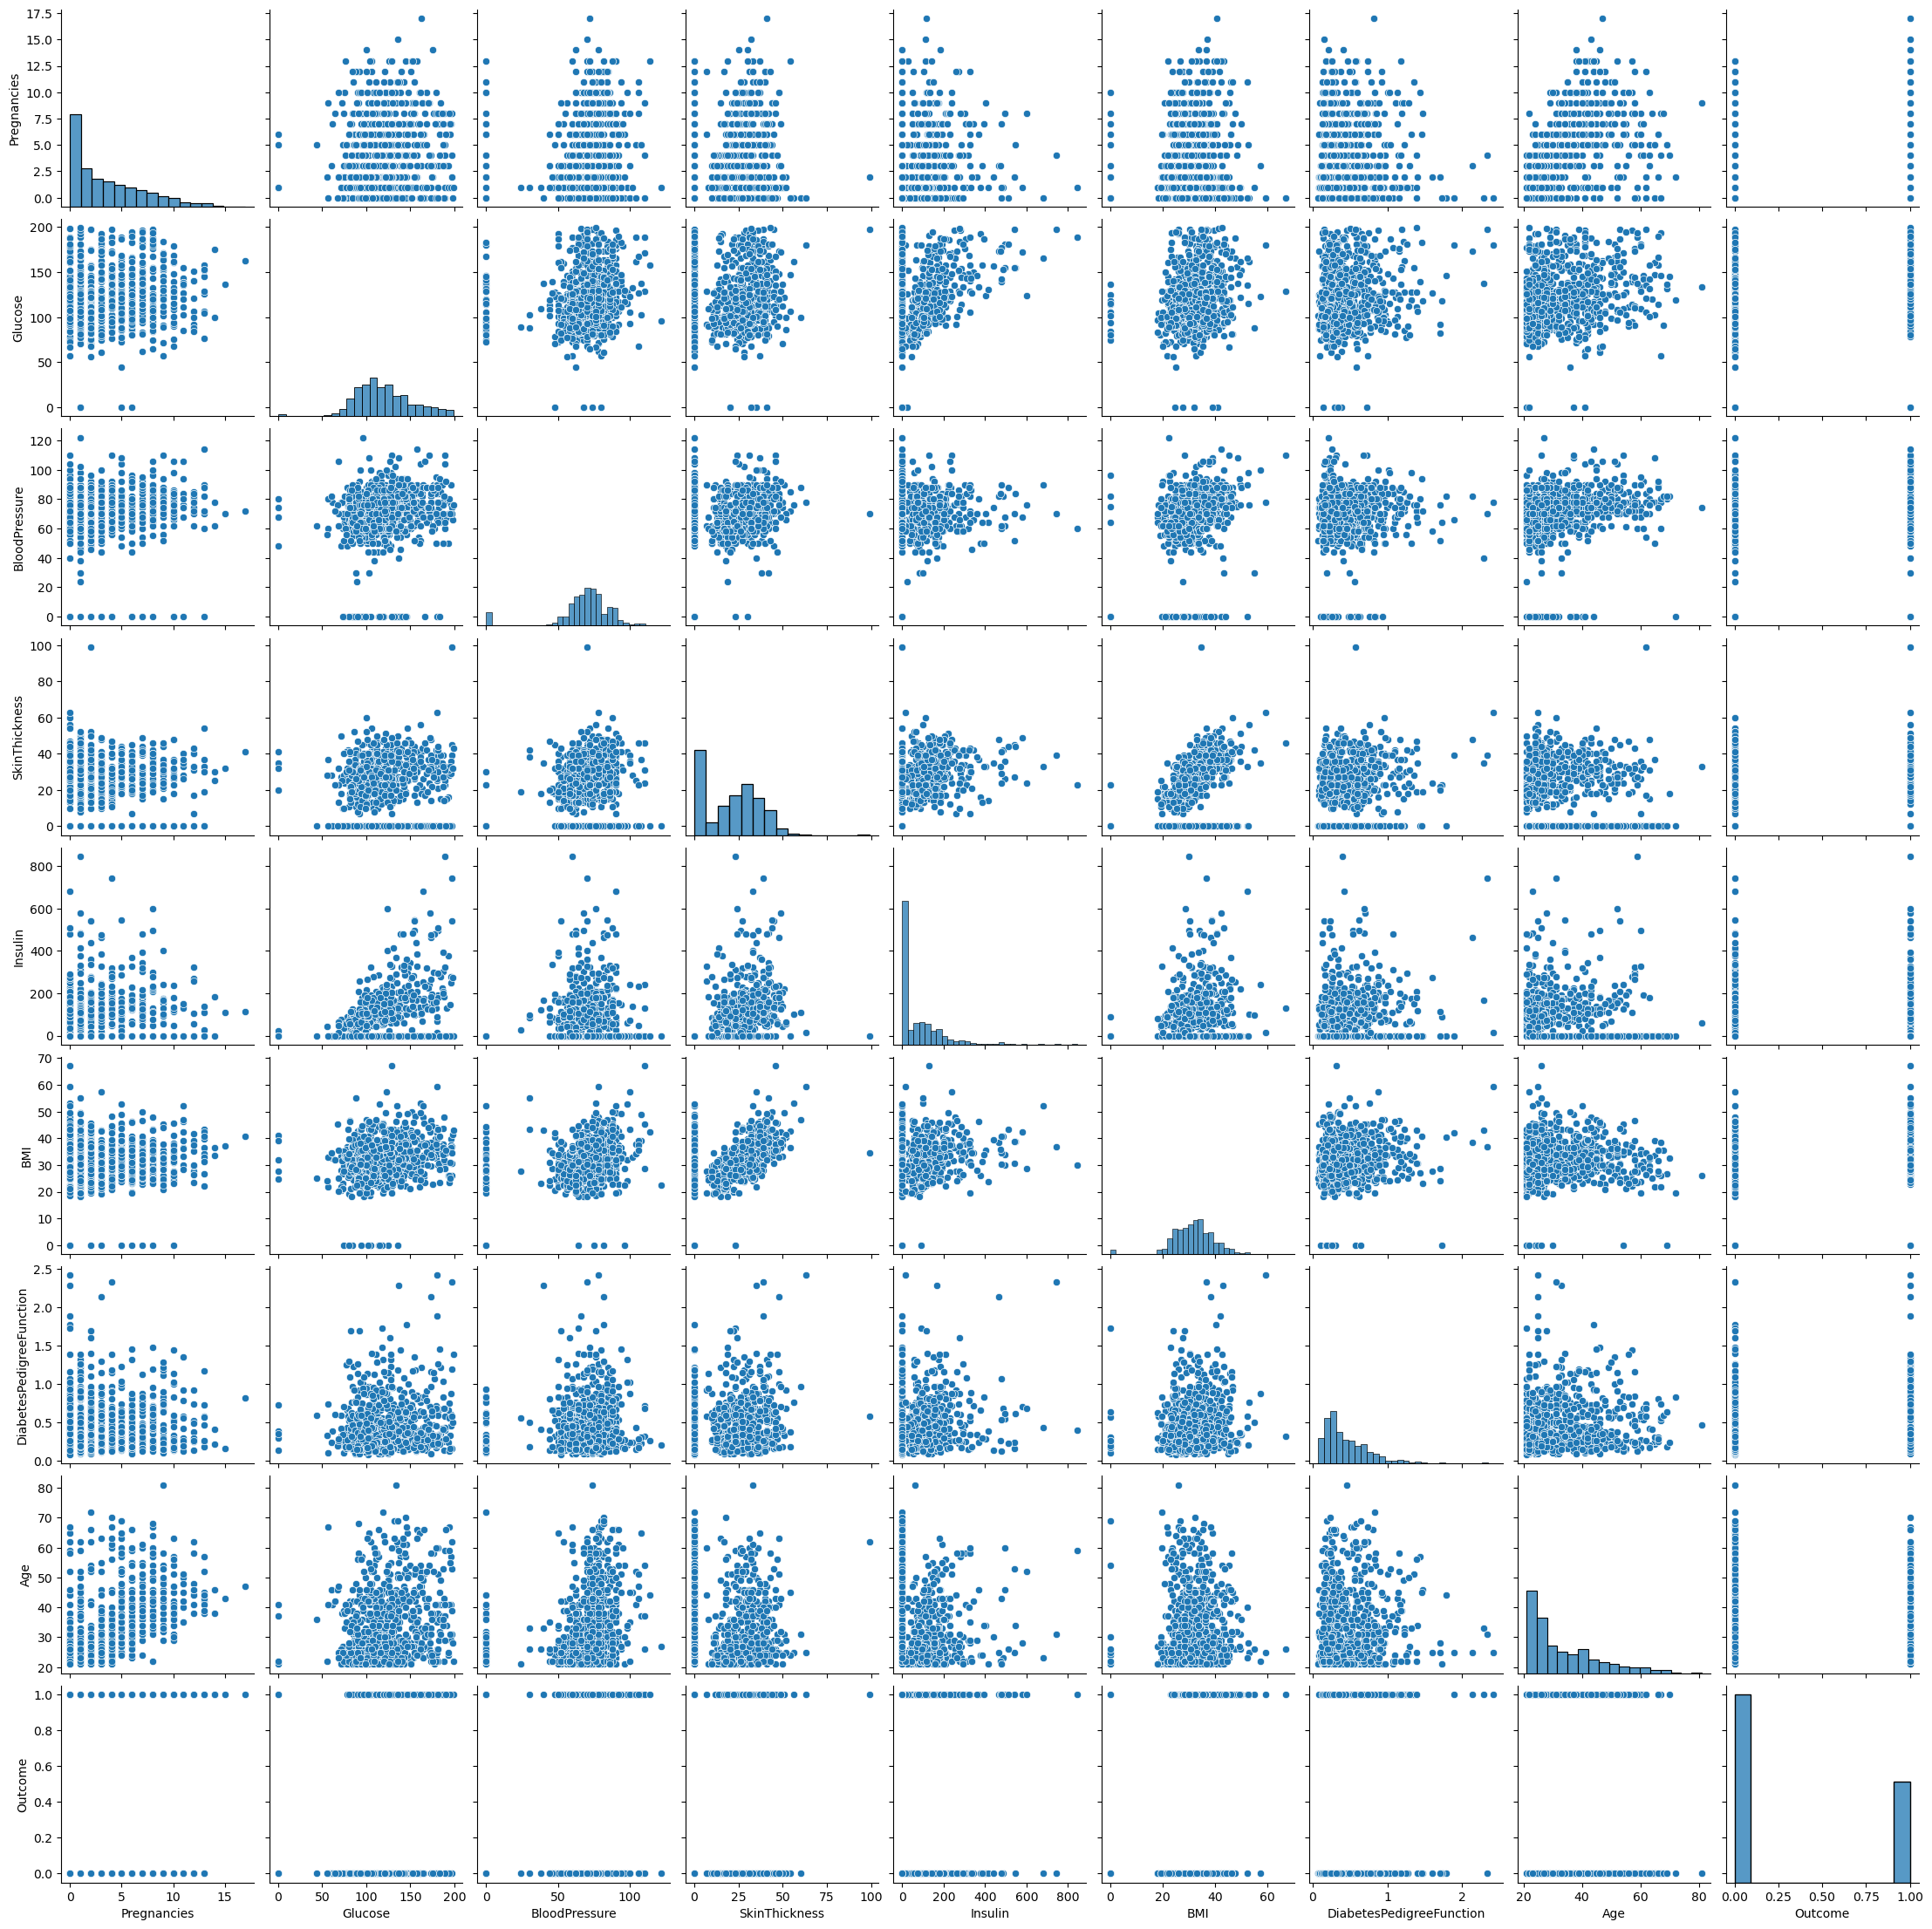

In [16]:
# just one example: look at the pairwise distribution. Identify correlated data
sns.pairplot(diabetes_data)

### Pairplots and correlations
Get some ideas how to plot data:
https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166
  


### Exercise Data Exploration

excercise 1  
- Plot skin thinkness vs. BMI. 
- Comment your observation
- Quantify the linear relationship between the two features (hint: correlation coefficient)

exercise 2  
- make a guess which single feature could predict the outcome (the binary variable 'outcome' in your dataframe). 
- Visualize your hypothesis do the following: plot all datapoints (only that single feature) on a line. Use two different colors for the outcomes 0/1. Plot the datapoints using a low transparency (opacity, alpha).





<Axes: xlabel='Outcome', ylabel='Insulin'>

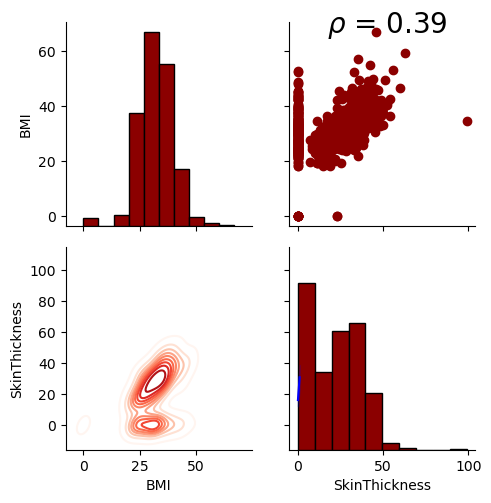

In [6]:
def corr(x, y, **kwargs):
    coef = np.corrcoef(x, y)[0][1]
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)
    
# Create a pair grid instance
grid = sns.PairGrid(data= diabetes_data, vars = ['BMI', 'SkinThickness'])

grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'darkred');

sns.lineplot(data=diabetes_data, x='Outcome', y='Insulin', color='blue')






<Axes: xlabel='Outcome', ylabel='SkinThickness'>

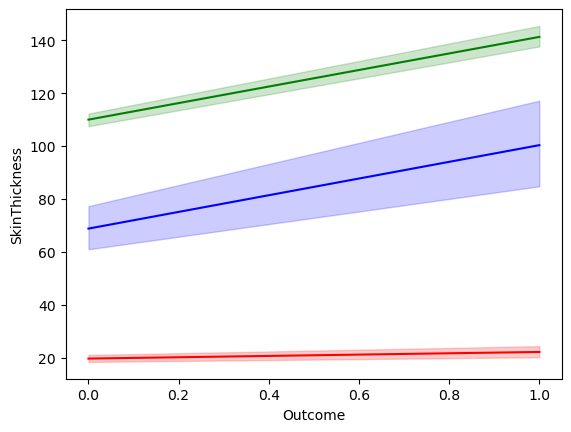

In [7]:

sns.lineplot(data=diabetes_data, x='Outcome', y='SkinThickness', color='red')
sns.lineplot(data=diabetes_data, x='Outcome', y='Insulin', color='blue')
sns.lineplot(data=diabetes_data, x='Outcome', y='Glucose', color='green')


### Discussion, Observations
- add your comments here




### Exercise: data cleansing. remove 0/null
Your data contains invalid values (0, null). Identify and remove them:

- Figure out how to identify these values your dataframe. Do not code a for-loop / if condition. Use a pandas function.
- Count: How many samples have at least one invalid entry?
- Should we **remove** these **rows** from the dataframe? Why? Why not?
- Discuss: Do we have other options?

In [20]:
invalid_rows = diabetes_data.isnull() | (diabetes_data == 0)
invalid_rows_summary = invalid_rows.any(axis=1)

count_invalid = invalid_rows_summary.sum()
print(count_invalid)

diabetes_data.replace(0, np.nan, inplace=True)
diabetes_data.fillna(diabetes_data.mean(), inplace=True)


657


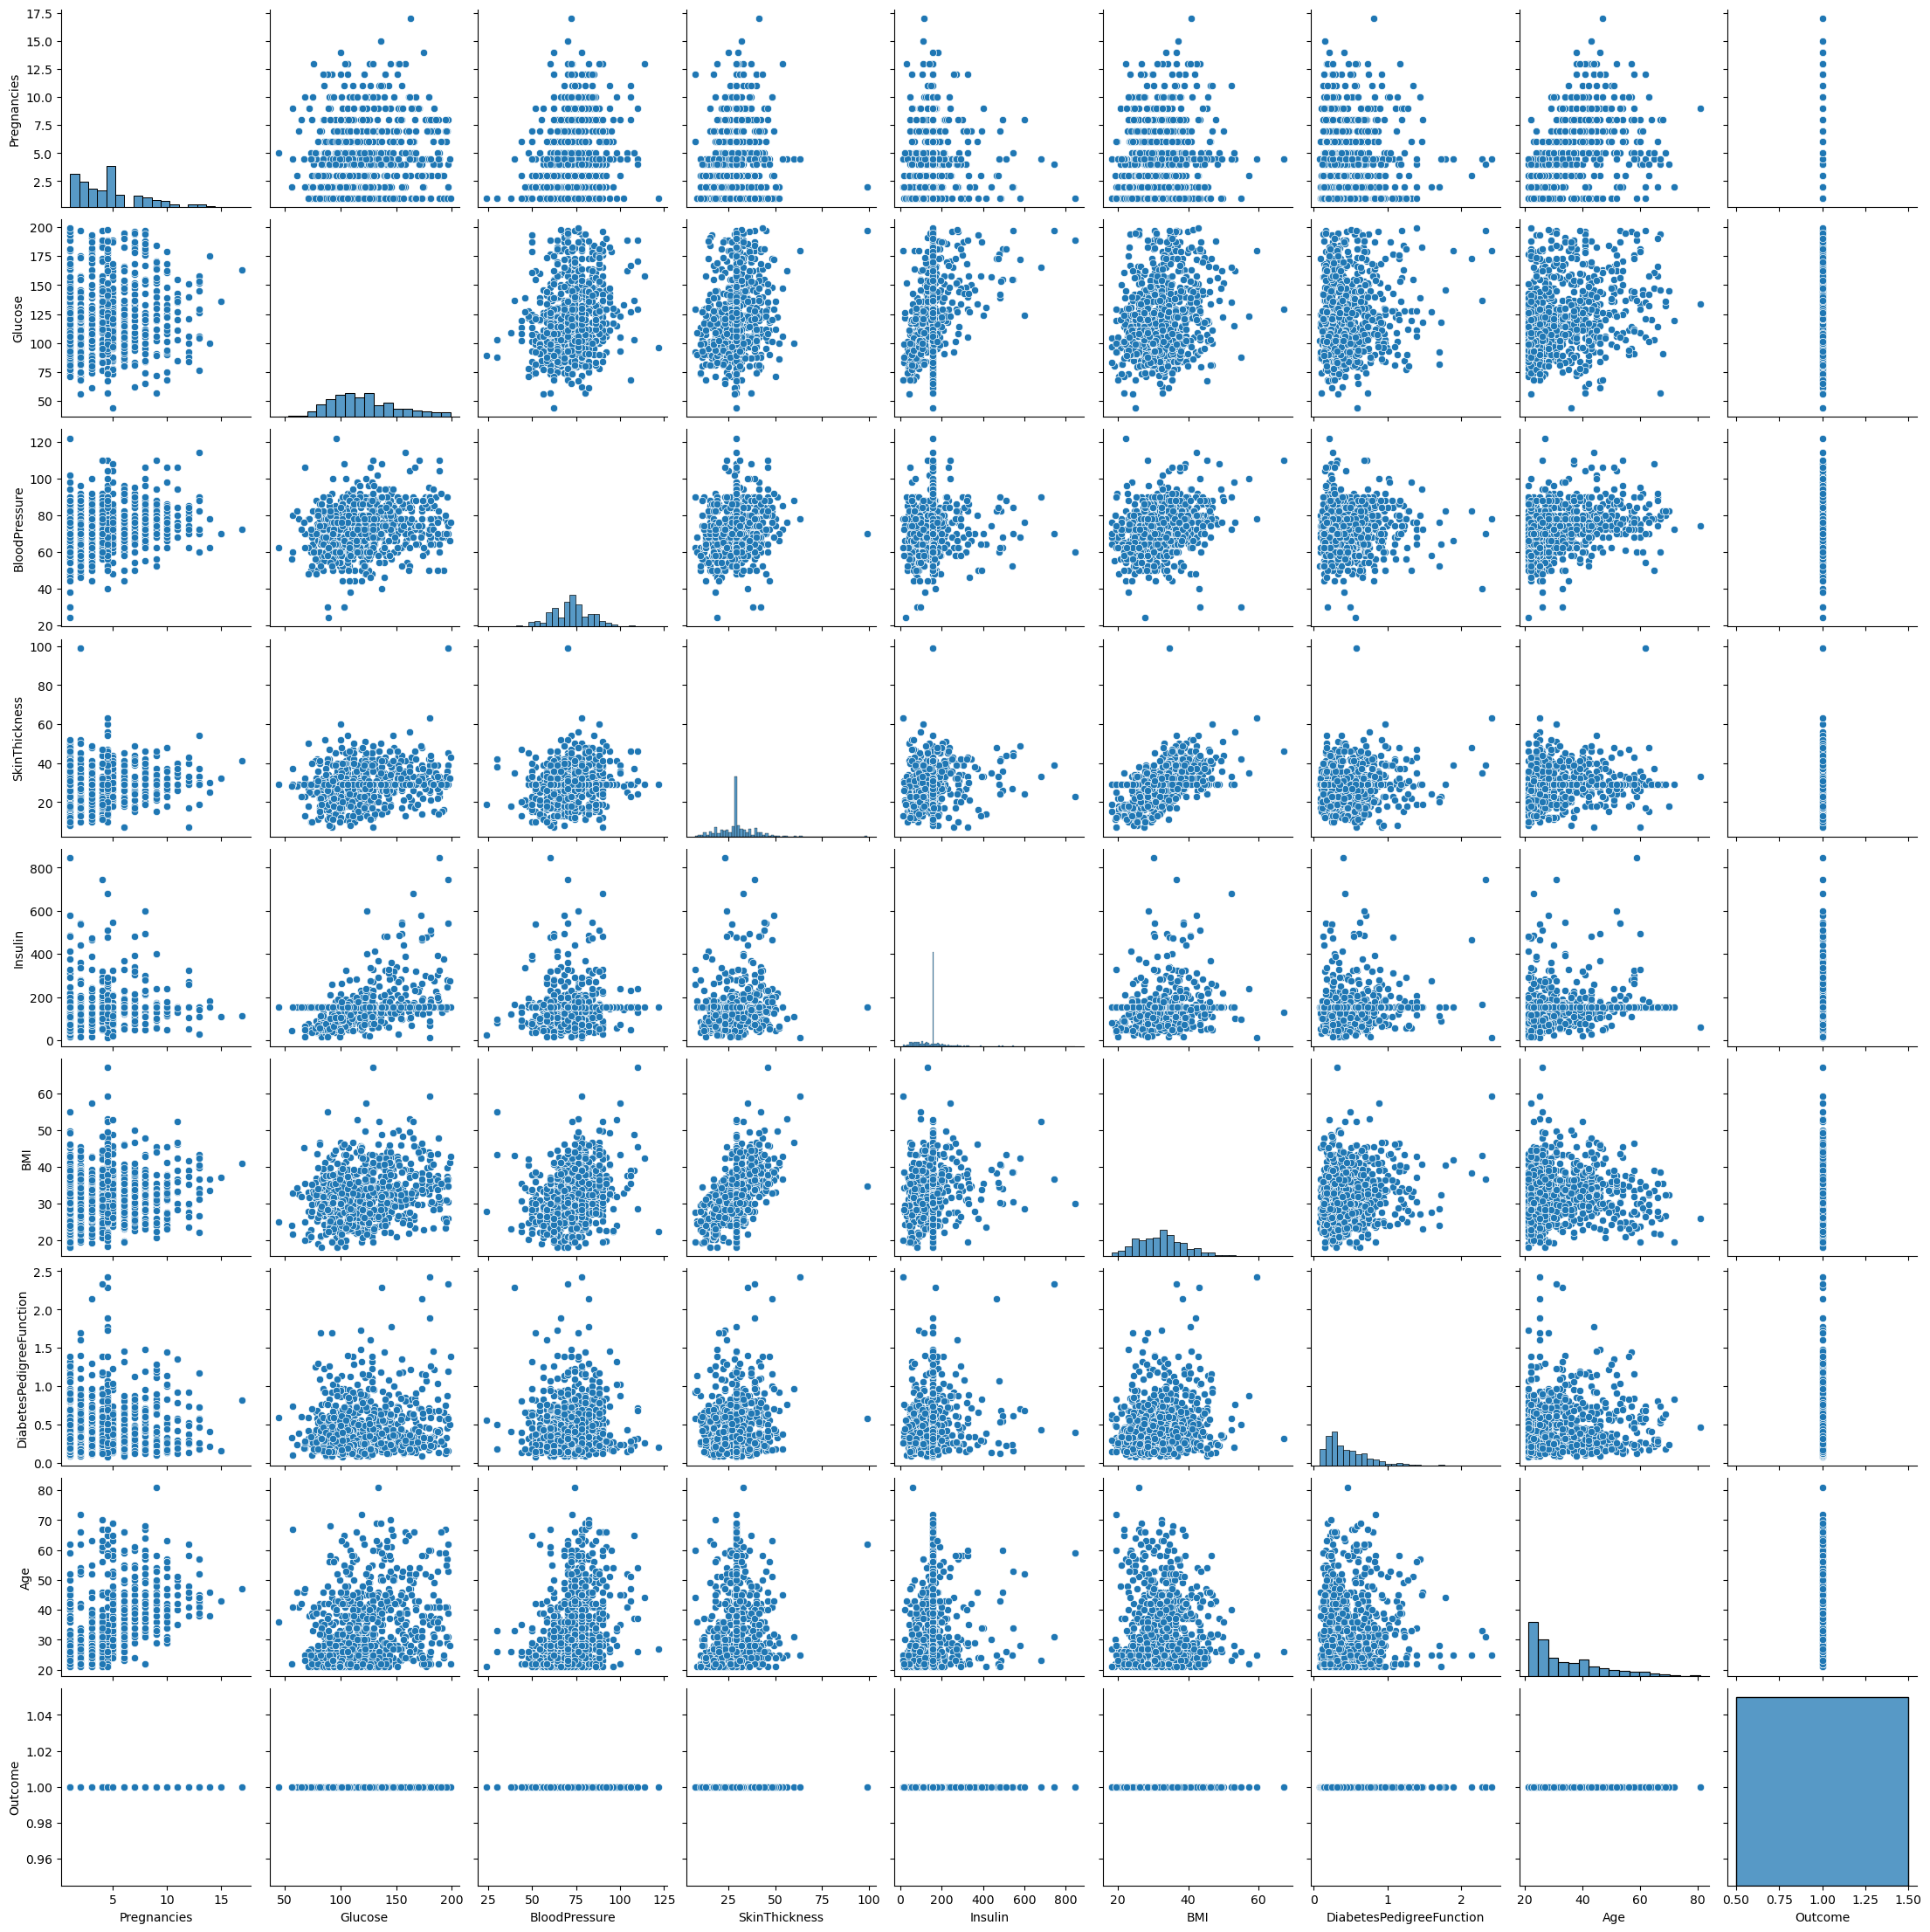

In [9]:
# just one example: look at the pairwise distribution. Identify correlated data
sns.pairplot(diabetes_data)

# optional: preprocessing Exercise
Before doing any ML, data usually needs some pre-processing. Here we replace invalid values and apply standardize the data:

1)  
Removing columns with invalid values is not a good idea. A better way to deal with invalid values (zeroes, null) is to replace them with the mean or median of the column.
- Replace the invalid values (zeroes) of the BMI-column with the median BMI. Hint: use the Pandas "replace" function
- be careful: 0 is not always an invalid value. A 0 in 'outcome' or in 'pregnancy' is a valid data.

2) 
Many ML algorithms work better if all data have the same "scale". It is therefore a common practice to standardize data. After Standardization, every column has $mean=0$, $std=1$
- Scale the data. You can implement this with Pandas or using sklearn.preprocessing.StandardScaler


In [19]:
# load the dataset again before starting.
diabetes_data2 = pd.read_csv('diabetes_dataset.csv')

invalid_values = (diabetes_data2 == 0)

median_bmi = diabetes_data['BMI'].median()

diabetes_data['BMI'].replace(to_replace=0, value=median_bmi, inplace=True)

print(diabetes_data2['BMI'])



0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64


/var/folders/y7/1yr7s8x554n6tlb8fzt1fnd80000gn/T/ipykernel_72448/1661692898.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_data['BMI'].replace(to_replace=0, value=median_bmi, inplace=True)


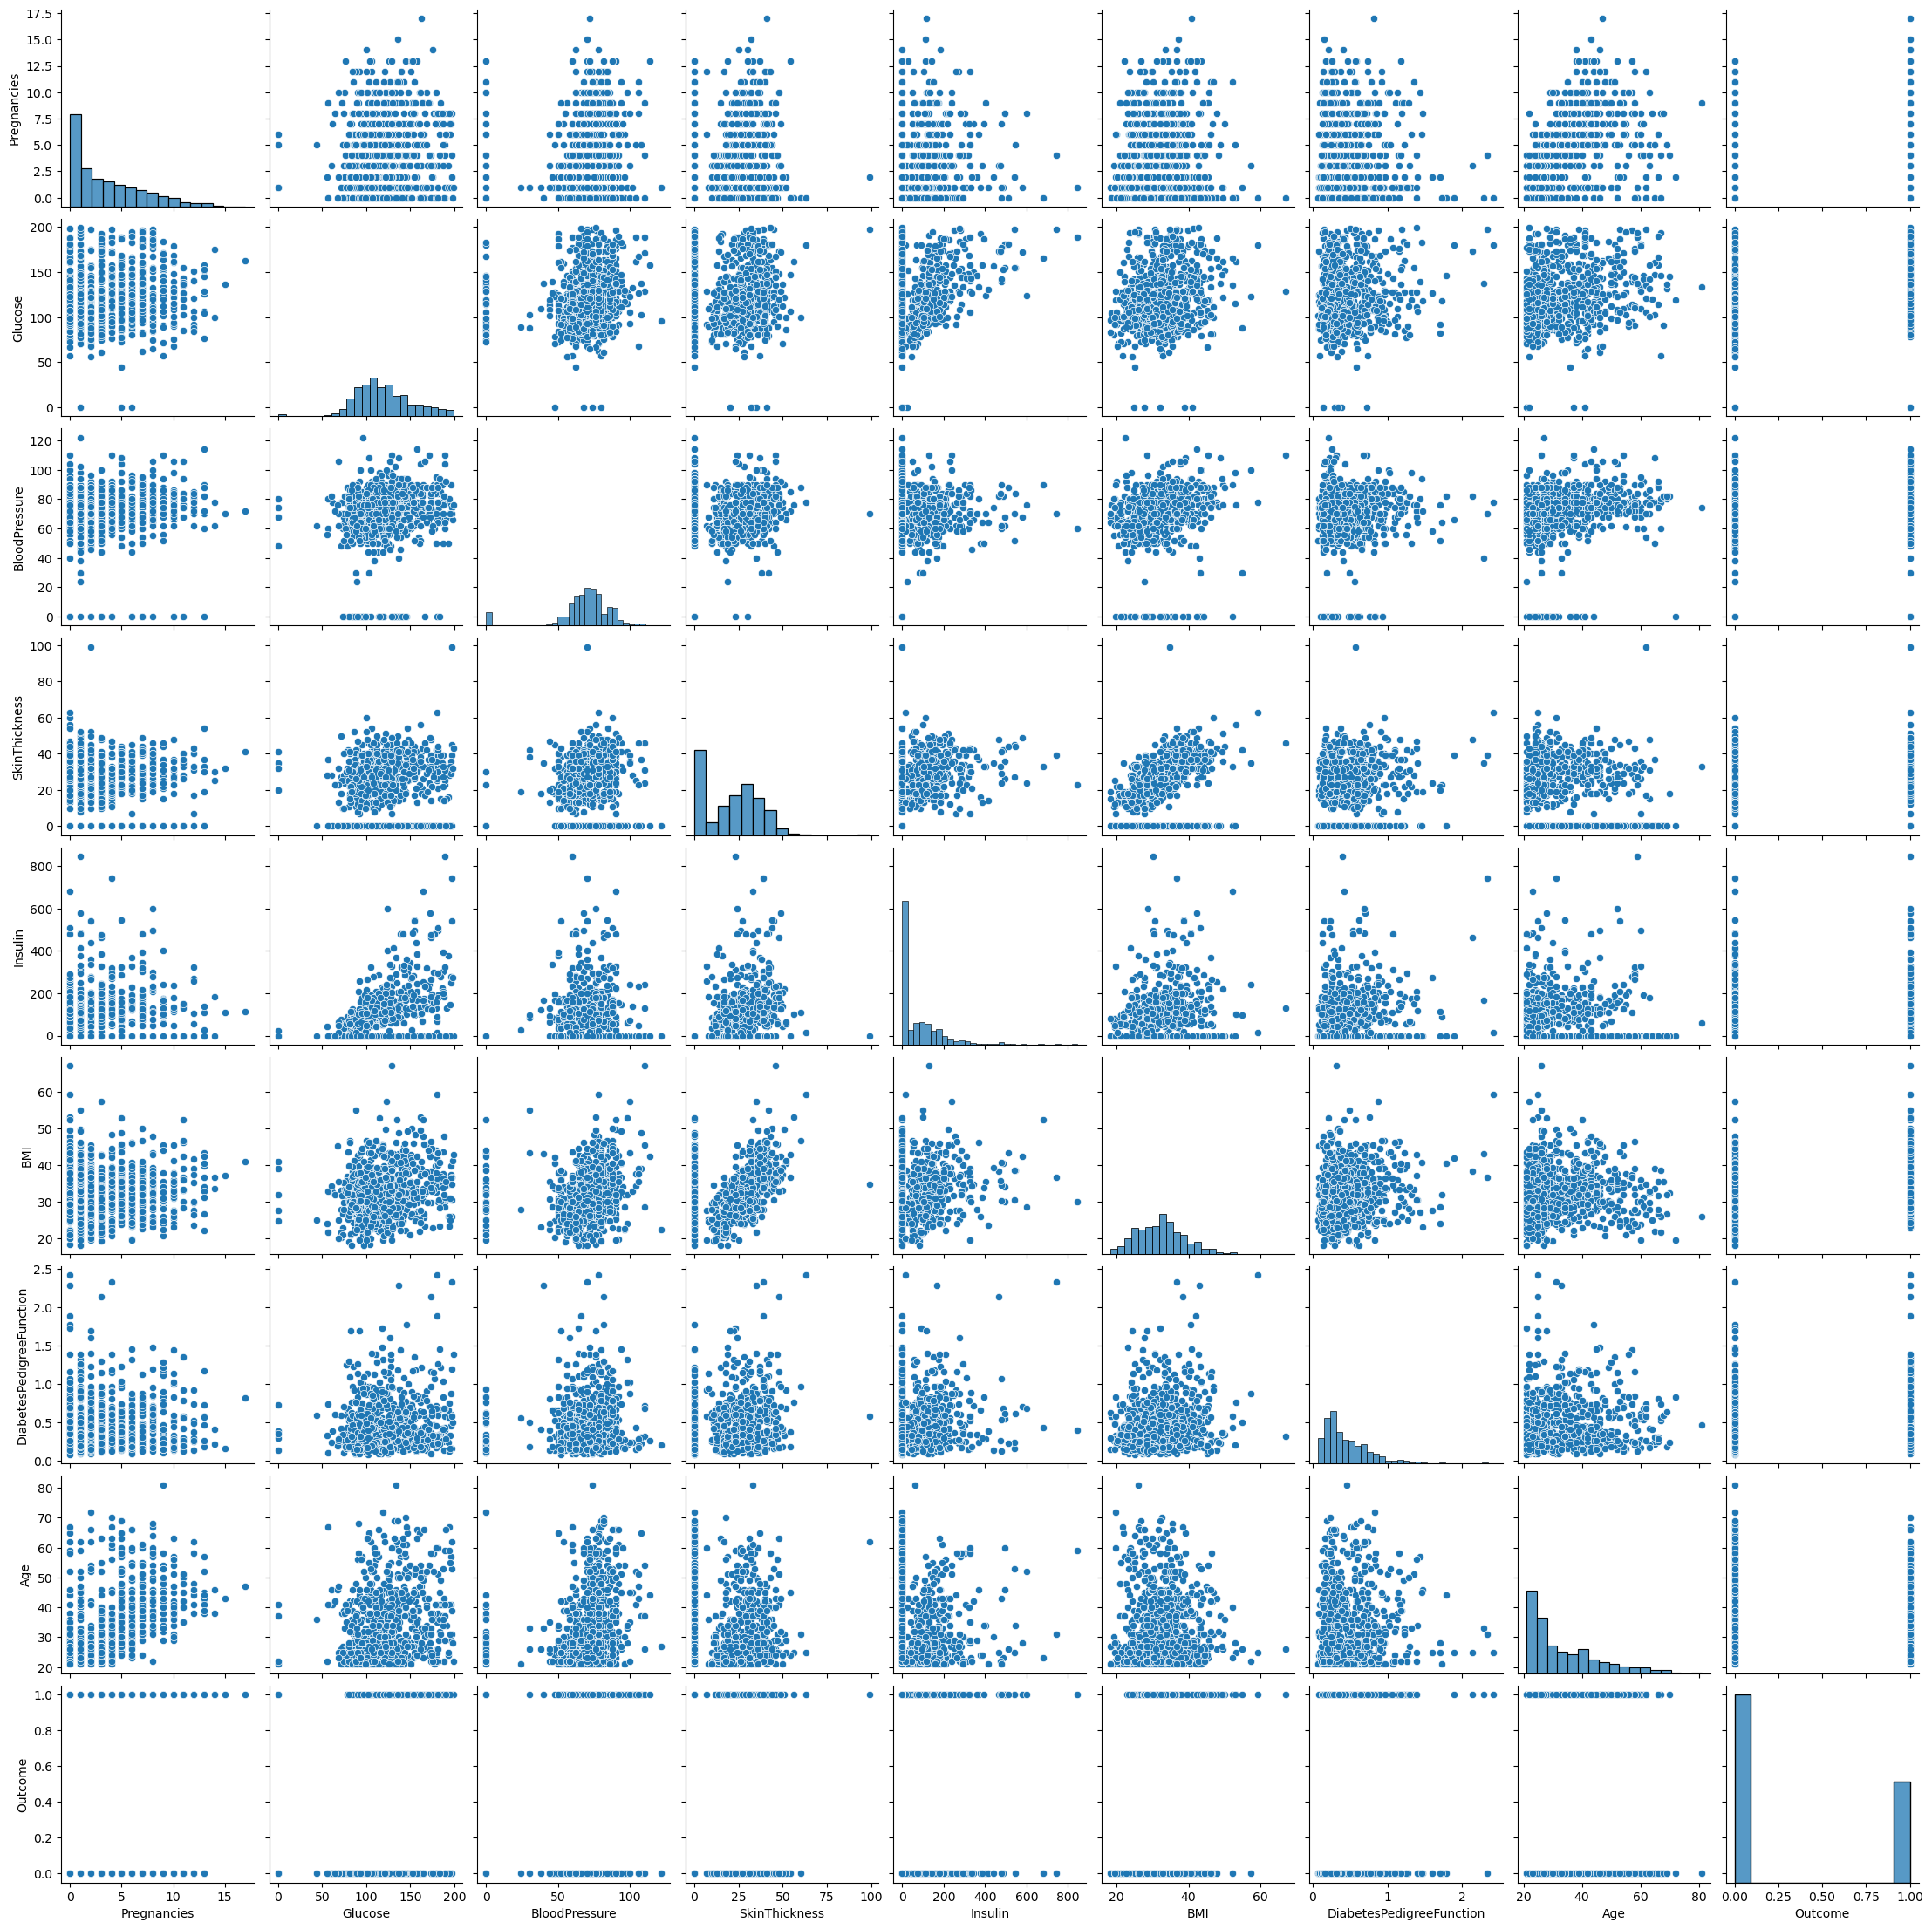

In [18]:
# just one example: look at the pairwise distribution. Identify correlated data
sns.pairplot(diabetes_data)